In [63]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as pl
import random

In [46]:
centroids = [[-5, 6], [6, 9]]
cluster_std = [1, 2]

In [77]:
X, y = make_blobs(n_samples=100, n_features=2, centers=centroids, cluster_std = cluster_std, random_state=2)

In [ ]:
X, y

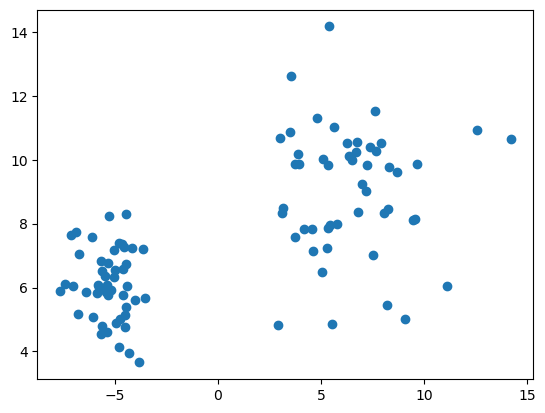

In [79]:
pl.scatter(X[:, 0], X[:, 1])

<h1>K means class</h1>

In [186]:
class KMeans:
    def __init__(self, n_clusters, max_itr=100):
        self.n = n_clusters
        self.itr = max_itr
        self.centroids = None

    def fit_predict(self, X):
        indices = random.sample(range(0, X.shape[0]), self.n)
        self.centroids = X[indices]
        
        for i in range(self.itr):
            cluster_group = self.assign_clusters(X)
            # move centroids
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X, cluster_group)

            if(self.centroids == old_centroids).all():
                break

        return np.array(cluster_group)

    def assign_clusters(self,X):
        cluster_group = []
        distances = []
        for row in X:
            for centre in self.centroids:
                distances.append(np.sqrt(np.dot(row-centre, row-centre)))
            min_dis = min(distances)
            index = distances.index(min_dis)
            distances.clear()
            cluster_group.append(index)

        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for cluster in cluster_type:
            new_centroids.append(X[cluster_group == cluster].mean(axis=0))
        return np.array(new_centroids)

In [188]:
X.shape

(100, 2)

In [190]:
km = KMeans(n_clusters=2, max_itr=100)

In [192]:
y_means = km.fit_predict(X)

In [194]:
cluster1 = X[y_means == 0]
cluster1

array([[ 6.73010703, 10.54816407],
       [ 7.59835999, 11.52522733],
       [ 6.79304032,  8.37076513],
       [ 8.23577347,  8.45151582],
       [14.21738525, 10.64224175],
       [ 7.22028817,  9.8469938 ],
       [ 3.0932713 ,  8.32396445],
       [ 9.06352063,  5.02830845],
       [ 5.34990074,  7.87953099],
       [ 5.54350488,  4.86077547],
       [ 7.92156389, 10.51674069],
       [ 5.06330748,  6.49055939],
       [ 6.9958803 ,  9.25300835],
       [ 6.71826666, 10.24444083],
       [ 4.56149232,  7.83317081],
       [ 4.81248883, 11.29900114],
       [11.10087647,  6.0536535 ],
       [ 8.67113234,  9.60525867],
       [ 7.39239596, 10.39483254],
       [ 3.95717054,  9.8647914 ],
       [ 5.77115741,  8.00365161],
       [ 5.39182712, 14.17058974],
       [ 8.06605813,  8.34199513],
       [ 5.27104182,  7.24804104],
       [ 5.09154429, 10.02874143],
       [ 5.35283986,  9.84764942],
       [ 9.67066545,  9.88137974],
       [ 3.87840193, 10.18333304],
       [ 4.6028201 ,

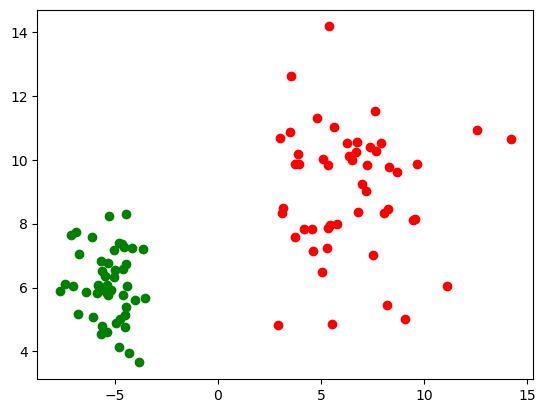

In [198]:
# for i in range(len(centroids)):
#     pl.scatter(X[y_pred == i, 0], X[y_pred == i, 1], color="red")
pl.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color="red")
pl.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color="green")
pl.show()

In [ ]:
y_pred